# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [41]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [43]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [45]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [47]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


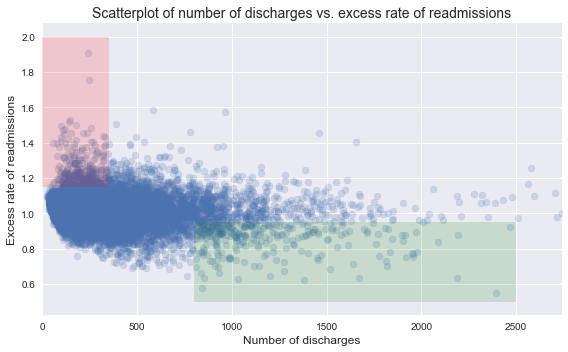

In [51]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [53]:
# Your turn

In [55]:
hospital_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].reset_index(drop=True)

In [57]:
hospital_df = hospital_df[['Number of Discharges','Excess Readmission Ratio']].dropna()

In [59]:
hospital_df.columns = ['dicharges','ratio']

In [61]:
hospital_df.head()

,dicharges,ratio
0,242,1.9095
1,247,1.7521
2,586,1.5836
3,965,1.5760
4,149,1.5308


In [63]:
hospital_df.dicharges = hospital_df.dicharges.astype(int)

In [129]:
hospital_df.describe()

,dicharges,ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


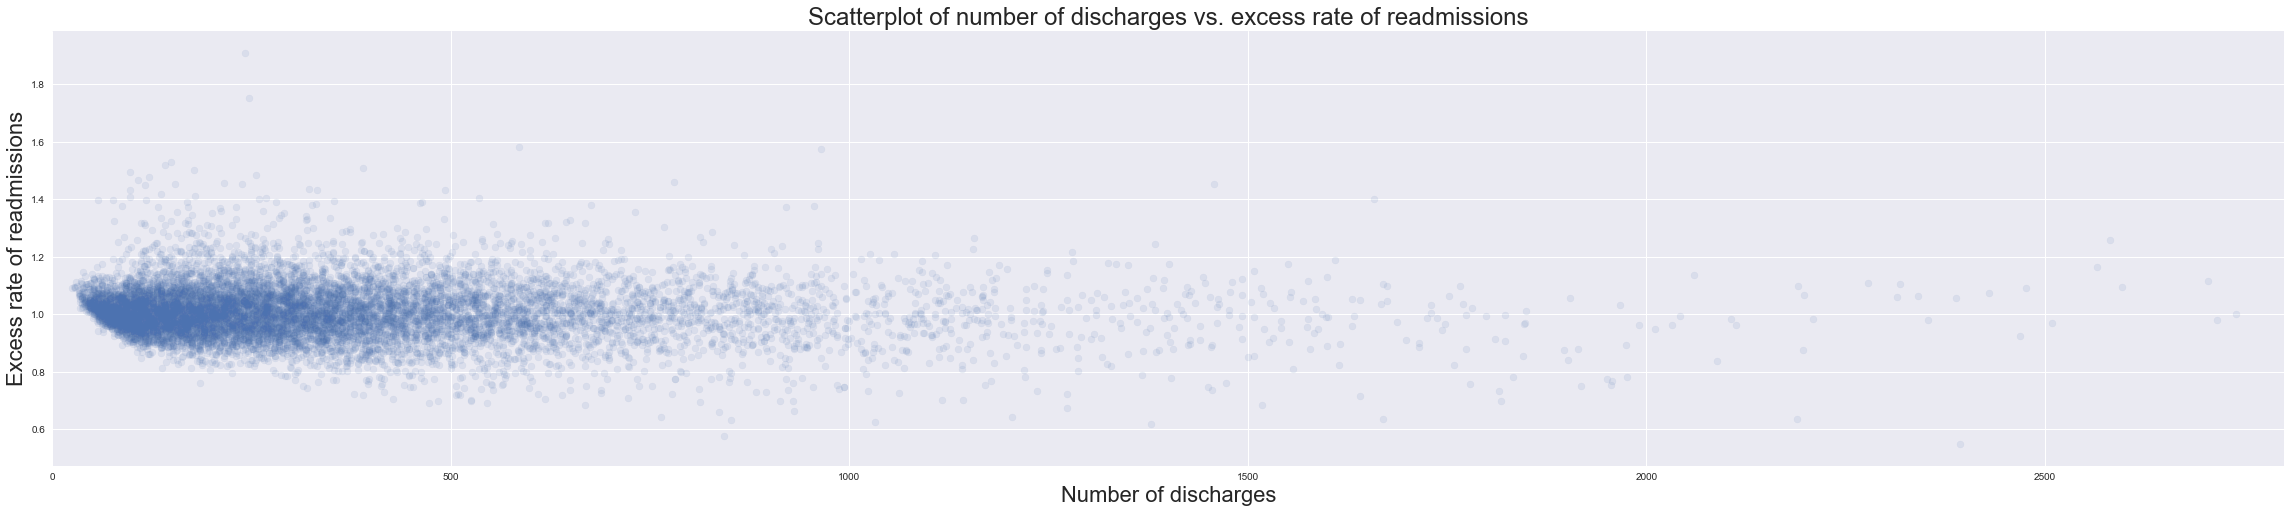

In [167]:
plt.figure(figsize=(40,8))
plt.scatter(x=hospital_df.dicharges, y=hospital_df.ratio, alpha = .1)
plt.xlim(0,2800)
plt.xlabel('Number of discharges', fontsize=22)
plt.ylabel('Excess rate of readmissions', fontsize=22)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=24)

plt.show()

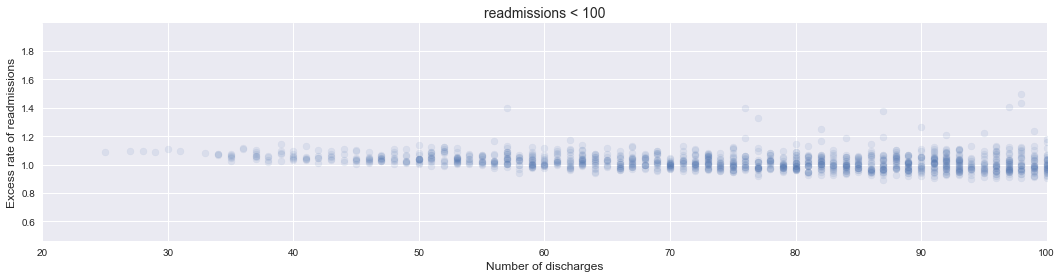

In [173]:
plt.figure(figsize=(18,4))
plt.scatter(x=hospital_df.dicharges, y=hospital_df.ratio, alpha = .1)
plt.xlim(20,100)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Discharges < 100', fontsize=14)
plt.show()

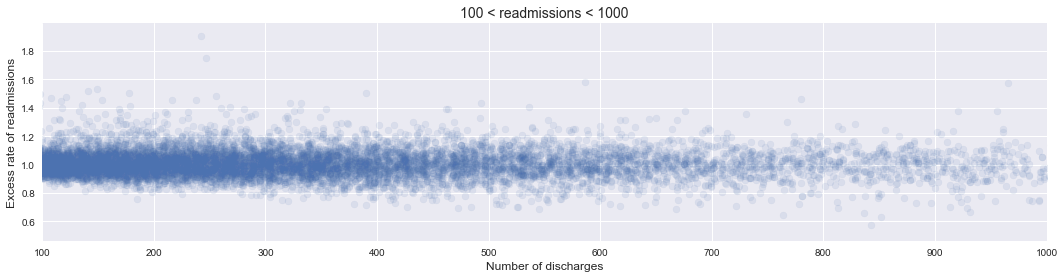

In [172]:
plt.figure(figsize=(18,4))
plt.scatter(x=hospital_df.dicharges, y=hospital_df.ratio, alpha = .1)
plt.xlim(100,1000)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('100 < Discharges < 1000', fontsize=14)
plt.show()

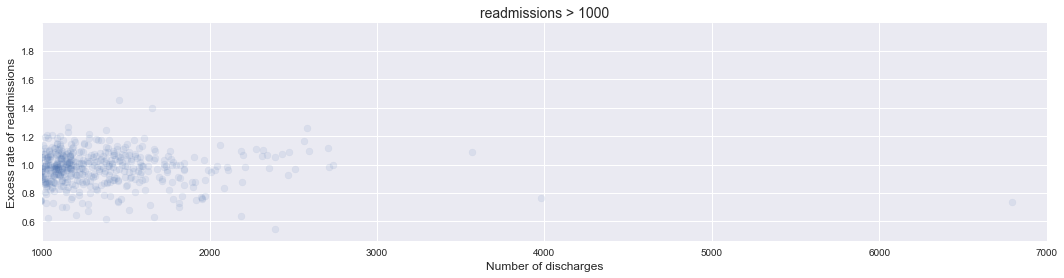

In [174]:
plt.figure(figsize=(18,4))
plt.scatter(x=hospital_df.dicharges, y=hospital_df.ratio, alpha = .1)
plt.xlim(1000,7000)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Discharges > 1000', fontsize=14)
plt.show()

In [149]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(18,8)})


Text(0.5,1,'Regression Line')

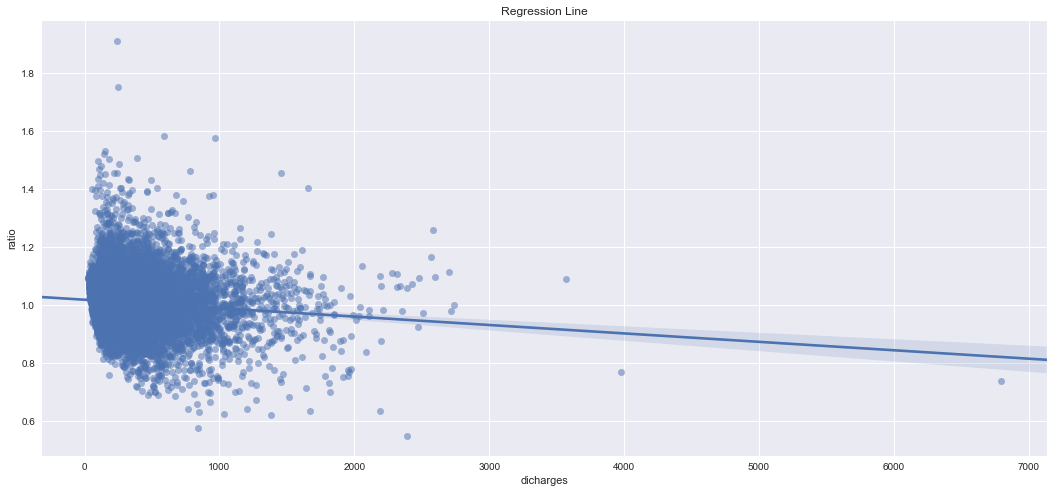

In [175]:
ax = sns.regplot(x='dicharges', y='ratio', data=hospital_df,scatter_kws={'alpha':0.5})
ax.set_title('Regression Line')

In [158]:
less_discharges = hospital_df[hospital_df.dicharges<100]
#less_discharges.describe()

Text(0.5,1,'Regression Line. Discharges < 100')

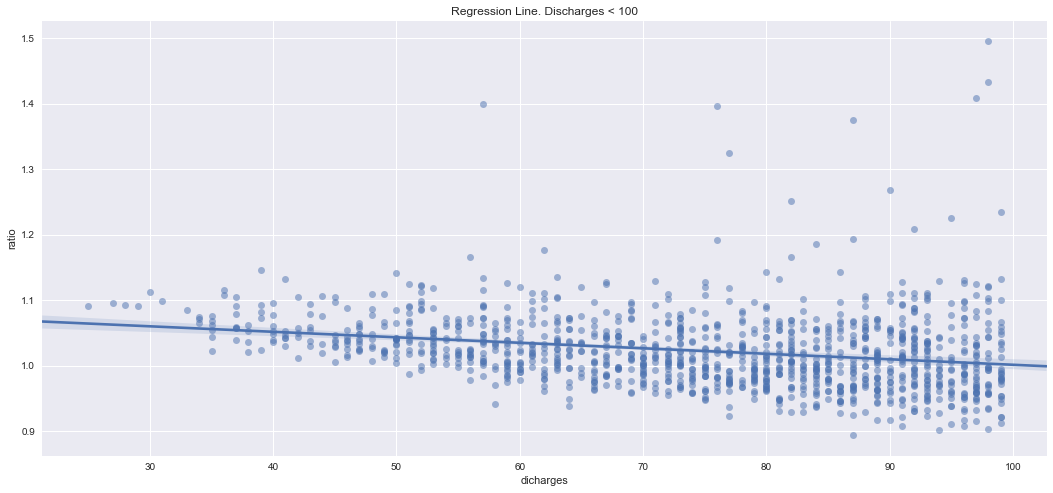

In [177]:
ax = sns.regplot(x='dicharges', y='ratio', data=less_discharges,scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges < 100')

In [160]:
more_discharges = hospital_df[(hospital_df.dicharges>1000)]
#more_discharges.info()

Text(0.5,1,'Regression Line. Discharges > 1000')

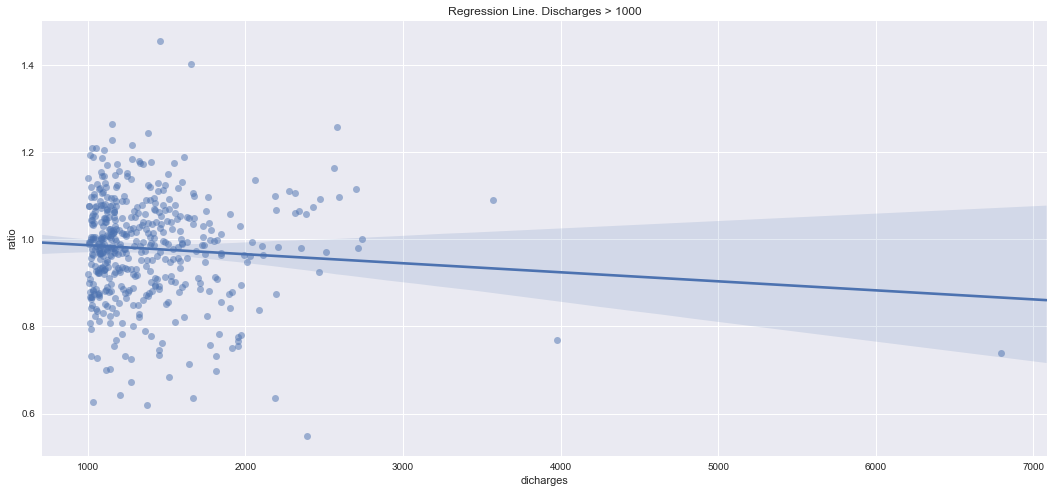

In [178]:
ax = sns.regplot(x='dicharges', y='ratio', data=more_discharges,scatter_kws={'alpha':0.5})
ax.set_title('Regression Line. Discharges > 1000')

In [24]:
np.mean(less_discharges.ratio)

1.0226183501683486

In [25]:
np.mean(more_discharges.ratio)

0.9783354211663071

****

## Preliminary Report Comments

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

A.
- Yes. The overall rate is trending down. But the rate of change is ever so small and is affected by the extreme values.    
- For really large number of dicharges the rate is really low.    
- And for very small discharges the rate is really high.

B. 
- Both are correct as we can see from calculations above.

### Statistical Analysis

Correlation coefficient between 2 variables gives the extent of relation between them. Its values lie between -1 to 1.
-1 means they are fully correlated but in opposite direction. As one variable increases the other decreases. Value of 1 means they are positively correlated. While 0 means there is no correlation whatsoever.

In [179]:
r = np.corrcoef(x=hospital_df.dicharges,y=hospital_df.ratio)[0][1]
print('correlation coefficient: ', r)

correlation coefficient:  -0.0973979435108


This value is very close to 0 as opposed to -1. So there might be some light correlation. We should do further hypothesis test to find out the statistical significance of this low correlation.

we can make statistical inferences and test hypotheses about a statistic if we know its expected distribution. If the data are normally distributed, and if the null hypothesis is that there is zero correlation, Pearson’s correlation coefficient follows a t-distribution, where the standard error of Pearson’s correlation coefficient is:

    Sr = √(1-r**2)/(n-2) 

The t-test for Pearson’s r has the standard setup, that is, the statistic minus the null hypothesis for the parameter, divided by the standard error of the statistic:

    t = (r - 𝛒)/Sr
    
So here is our Null and Alternate Hypothesis:

    H0: 𝛒 = 0
    H1: 𝛒 ≠ 0
    
at significance level of 𝛂 = 0.01

In [191]:
# since 𝛒=0 our formula for test statistic becomes: r * √(n-2)/(1-r**2)
n = len(hospital_df.dicharges)
t = r * np.sqrt((n-2)/(1-r**2))

print('t statistic value: ', t)

import scipy.stats as stats
p = stats.t.cdf(x=t,df=n-2) * 2
print('p value for t statistic: ', p)

t statistic value:  -10.4923808134
p value for t statistic:  1.22254737767e-25


In [190]:
r,p = stats.pearsonr(hospital_df.dicharges,hospital_df.ratio)
print('r and p values with formula. \nt: ', r, ' \np: ', p)

r and p values with formula. 
t:  -0.0973979435108  
p:  1.22254737768e-25


In [193]:
ci = stats.t.interval(alpha=0.9995, df=n-2)
print('confidence interval: ', ci)
print('t statistic value (-10.492) if very far from CI upper limit (3.481)')

confidence interval:  (-3.4817495357410899, 3.4817495357410899)
t statistic value (-10.492) if very far from CI upper limit (3.481)


Since p value is very low than 𝛂, we reject the null hypothesis in favor of the alternate hypothesis. The chances of getting the observed correlation coefficient is very low in random fashion. Hence the correlation is real, however small.

****

## Preliminary Report Comments

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

C. From our hypothesis test results we can see that there is signifcant (statistically and practically) correlation. 

D. Further investigation should be done to find out why the smaller hospitals have more re-admissions. Consolidation of smaller hospitals might not be a practical solution. These small hospitals might be distributed across low population areas.


### Other charts

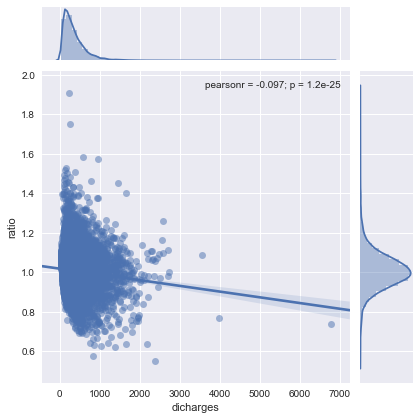

In [199]:
# scatterplot, correlation coefficient, p-value
sns.set(color_codes=True)
sns.jointplot('dicharges', 'ratio', data=hospital_df,
              kind='reg', size=6, scatter_kws={'alpha':0.5})
plt.show()

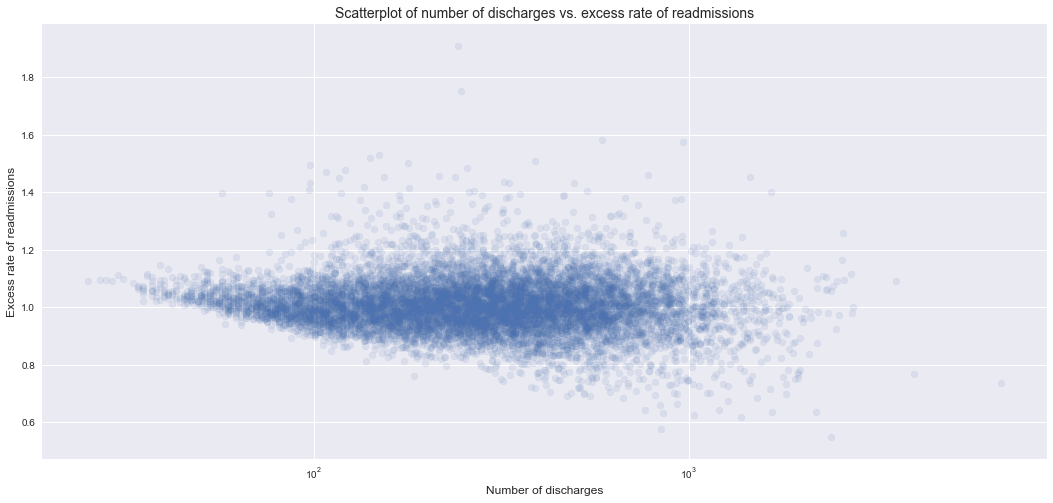

In [208]:
plt.scatter(x=hospital_df.dicharges, y=hospital_df.ratio, alpha = .1)
plt.xscale('log')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.show()